In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [3]:
# read csv file
df_prophet= pd.read_csv("X:/research paper-implementation/PJMW_hourly_preprocessed_prophet.csv")

In [4]:
# Prophet Data Preparation
df_prophet_modified_4_model = df_prophet[['Datetime', 'PJMW_MW']].rename(columns={'Datetime': 'ds', 'PJMW_MW': 'y'})
df_prophet_modified_4_model.head()

,ds,y
0,2002-04-01 01:00:00,4374.0
1,2002-04-01 02:00:00,4306.0
2,2002-04-01 03:00:00,4322.0
3,2002-04-01 04:00:00,4359.0
4,2002-04-01 05:00:00,4436.0


In [5]:
%pip install prophet
from prophet import Prophet

model = Prophet()
model.fit(df_prophet_modified_4_model)

Note: you may need to restart the kernel to use updated packages.


18:10:31 - cmdstanpy - INFO - Chain [1] start processing
18:12:37 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = model.make_future_dataframe(periods=168, freq='H')
forecast = model.predict(future)

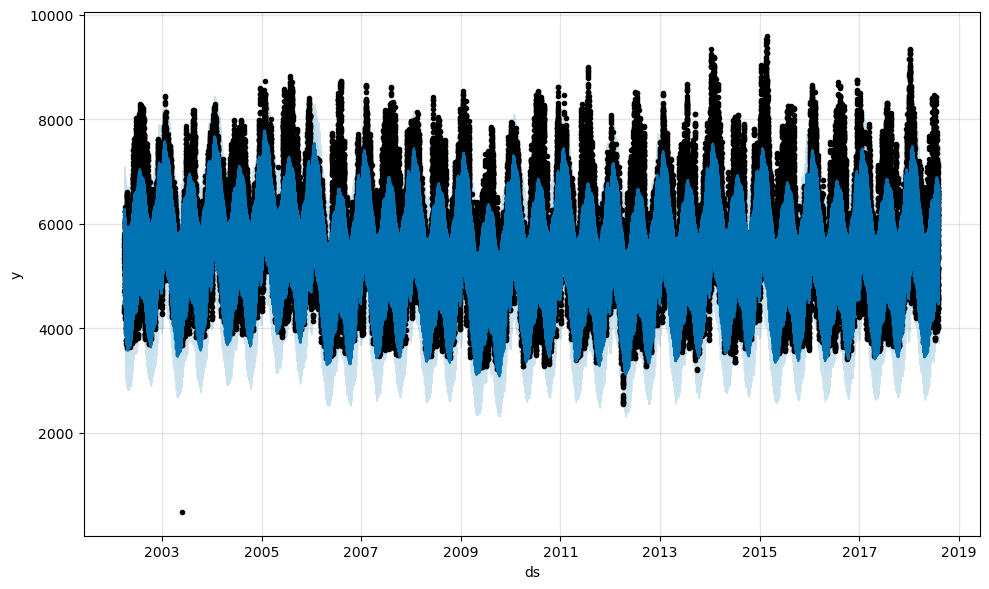

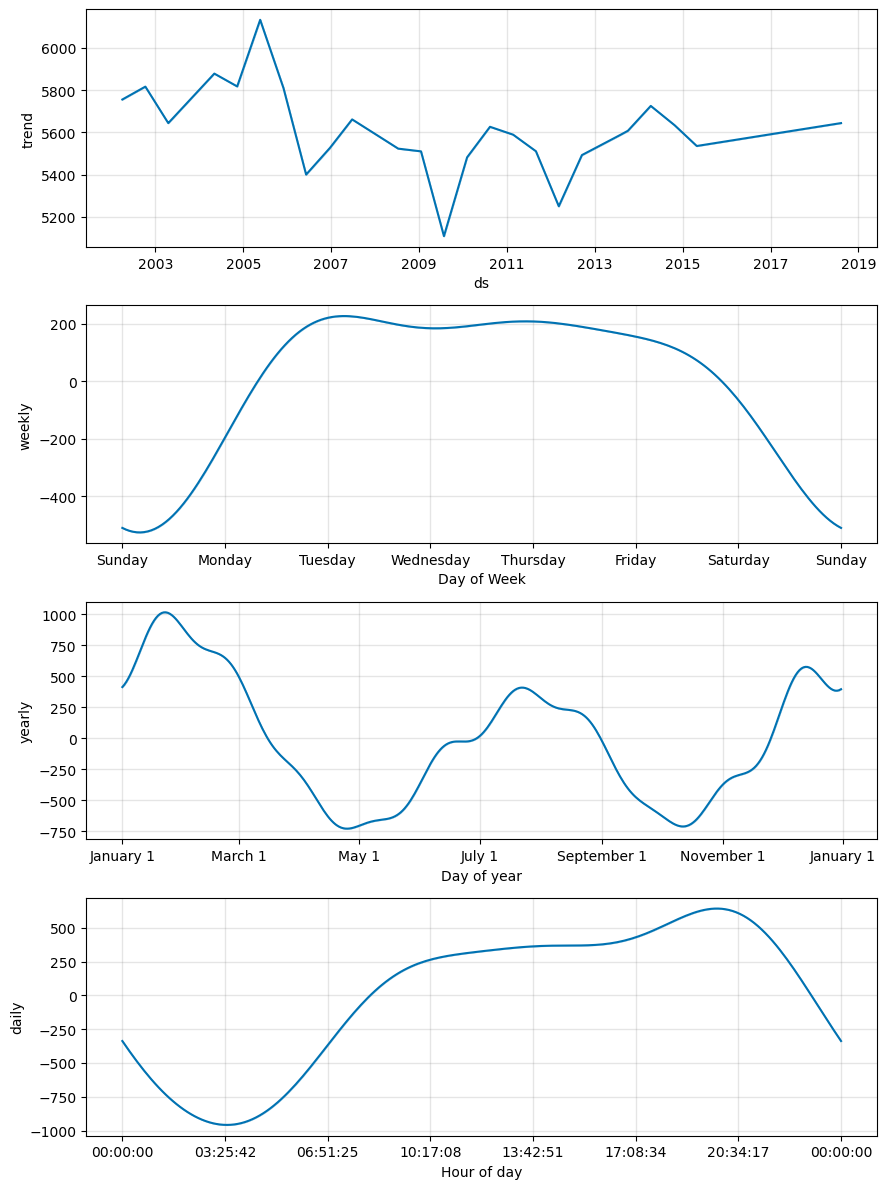

In [7]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [8]:
#explaining each graph:
# The first graph shows the forecasted values (yhat) along with the historical data.
# The second graph shows the trend and seasonality components of the forecast.


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
# Only compare on the historical period
y_true = df_prophet['PJMW_MW']
y_pred = forecast.loc[:len(y_true)-1, 'yhat']

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = (abs((y_true - y_pred) / y_true).mean()) * 100
r2 = r2_score(y_true, y_pred)
print(f"R-squared: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

R-squared: 0.6060
MAE: 467.63
RMSE: 614.66
MAPE: 8.35%


In [ ]:
# MAPE 8.35% is excellent (below 10% is considered very 
# strong for energy data).
#MAE/RMSE are both reasonable if your 
# PJMW_MW values are in the thousands 